In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from IPython import display

plt.ion()

%matplotlib inline

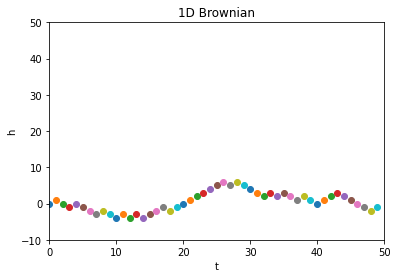

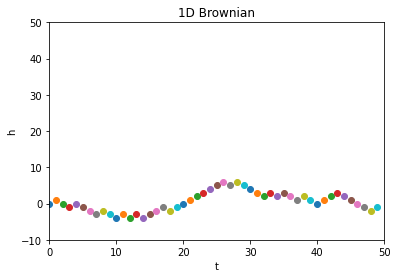

In [6]:
# x-axis = time
# y-axis = h
plt.title('1D Brownian')
plt.xlabel('t')
plt.ylabel('h')
plt.xlim(0, 50)
plt.ylim(-10, 50)

niters = 50
pos = np.array([ 0, 0 ])
rows = []
rows.append({ 'h': 0, 'h^2' : 0, 'h_mean' : 0, 'h^2_mean' : 0 })
for idx in np.arange(niters):
    plt.scatter(pos[0], pos[1])
    pos += np.array([1, 1]) if np.random.binomial(1, p=0.5) else np.array([1, -1])
    h_mean = np.mean([ rows[idx]['h'] for idx in range(len(rows))])
    h_squared_mean = np.mean([ rows[idx]['h^2'] for idx in range(len(rows))])
    rows.append({ 'h': pos[1], 'h^2' : pos[1]**2, 'h_mean' : h_mean, 'h^2_mean' : h_squared_mean })
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.5)
stats = pd.DataFrame(rows, columns=['h', 'h^2', 'h_mean', 'h^2_mean'])

In [7]:
print(stats.head(10))

   h  h^2    h_mean  h^2_mean
0  0    0  0.000000  0.000000
1  1    1  0.000000  0.000000
2  0    0  0.500000  0.500000
3 -1    1  0.333333  0.333333
4  0    0  0.000000  0.500000
5 -1    1  0.000000  0.400000
6 -2    4 -0.166667  0.500000
7 -3    9 -0.428571  1.000000
8 -2    4 -0.750000  2.000000
9 -3    9 -0.888889  2.222222


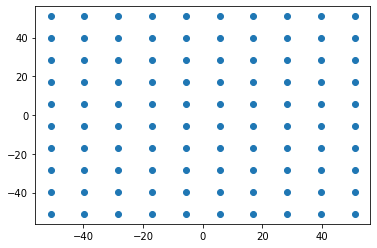

In [13]:
# grid -> NxN with items being the center point of each cell
n = 50
x_axis = np.linspace(-n - 1, n + 1, 10)
y_axis = np.linspace(-n - 1, n + 1, 10)
xx, yy = np.meshgrid(x_axis, y_axis)
plt.scatter(xx, yy)

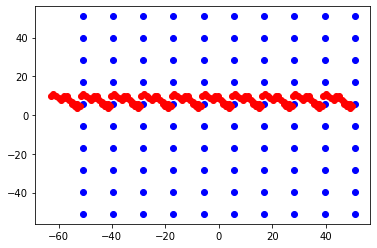

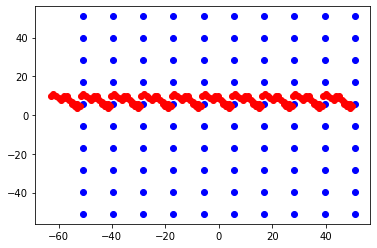

In [46]:
'''
 If you get a 1, mark the square to the left of the previous square. 
 If 2, mark the square below the previous one. 
 If 3, mark the one to the right, and if 4, mark the one above. 
 If you get 5 or 6, roll again.
'''
plt.scatter(xx, yy, c='b')
pos = [xx[int(0.5 * len(xx))], yy[int(0.5 * len(xx))]]
prob = 1 / 6.0
for idx in np.arange(20):
    draw = np.random.choice(np.arange(6), p=[prob] * 6) + 1
    while draw > 4:
        draw = np.random.choice(np.arange(6), p=[prob] * 6) + 1
        
    dx = -1; dy = 0
    if draw == 2: 
        dy = - 1
    elif draw == 3:
        dx = 1
    else:
        dy = 1
    pos[0] += dx
    pos[1] += dy
        
    plt.scatter(pos[0], pos[1], c='r')
        
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.5)